<a href="https://colab.research.google.com/github/eric1645/CSE--/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

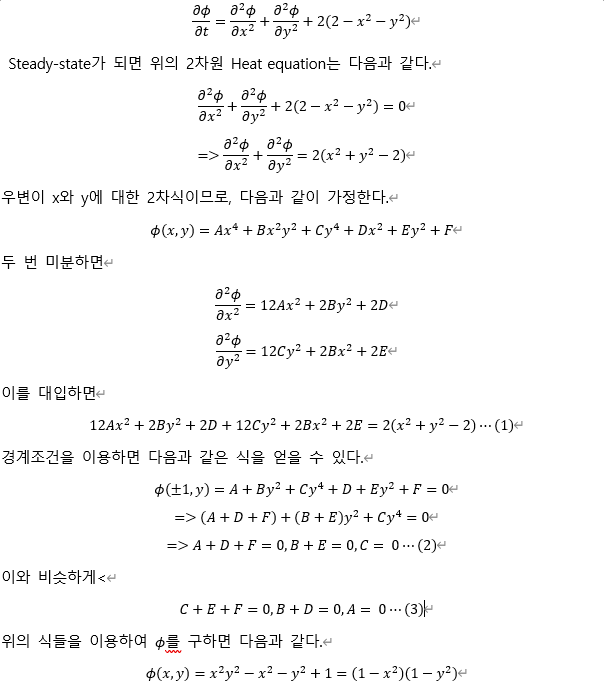

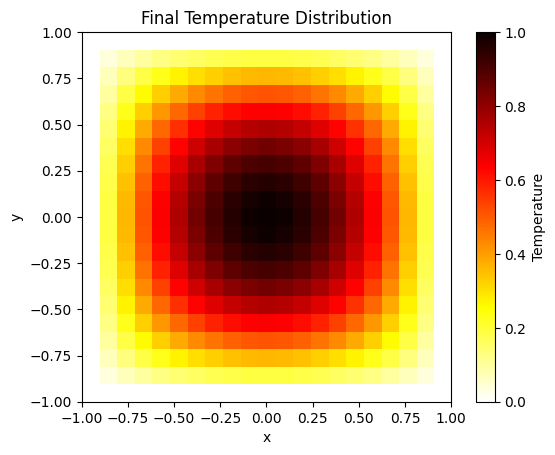

In [2]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def source(x, y):
  return 2*(2 - x**2 - y**2)

#parameters
Lx, Ly = 2, 2
Nx, Ny = 20, 20

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 1000
dt = 0.1
alpha = 1

#coefficient matrix
Ix = identity(n = Nx-1)
Iy = identity(n = Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty,Ix)/dy**2

I = identity((Nx-1)*(Ny-1))

A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

#phi
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
  phi_vec = np.array([])
  source_vec = np.array([])
  for y in range(1, Ny):
    phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
    source_vec = np.hstack((source_vec,source(Y[y], X[1:-1])))

  rhs = B @ phi_vec + dt*source_vec
  phi_new = spsolve(A, rhs)

  phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#시각화
plt.figure()
plt.imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
plt.colorbar(label='Temperature')
plt.title('Final Temperature Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

dt: 0.1, N: 21, M: 21
L2 norm of error: 6.221e-16


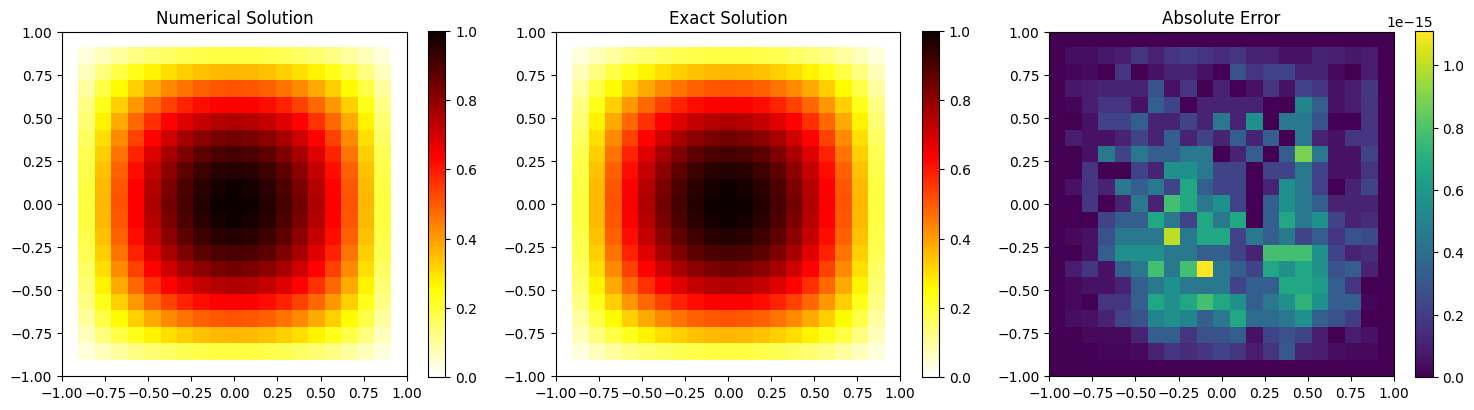

In [8]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 20, 20

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 1000
dt = 0.1
alpha = 1

print(f"dt: {dt}, N: {Nx+1}, M: {Ny+1}")

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))
A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

# initial condition
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#exact solution
XX, YY = np.meshgrid(X, Y)
phi_exact = exact_solution(XX, YY)

# L2 norm error 계산
error = phi - phi_exact
L2_error = np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy)
print(f"L2 norm of error: {L2_error:.3e}")

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

im0 = axs[0].imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[0].set_title("Numerical Solution")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(phi_exact, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[1].set_title("Exact Solution")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.abs(error), extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[2].set_title("Absolute Error")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


dt: 0.5, N: 21, M: 21
L2 norm of error: 1.297e-12


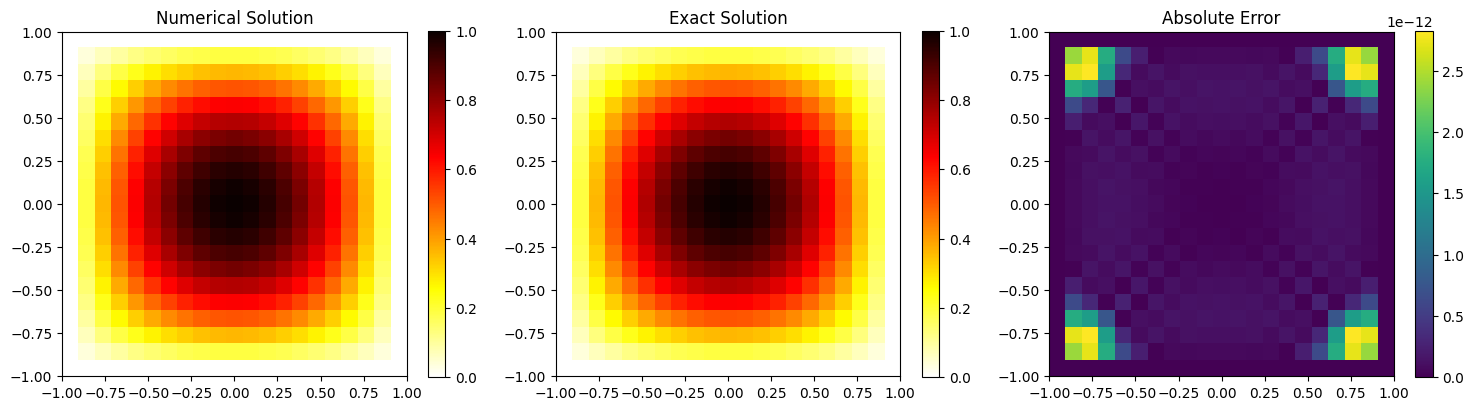

In [11]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 20, 20

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 1000
dt = 0.5
alpha = 1

print(f"dt: {dt}, N: {Nx+1}, M: {Ny+1}")

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))
A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

# initial condition
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#exact solution
XX, YY = np.meshgrid(X, Y)
phi_exact = exact_solution(XX, YY)

# L2 norm error 계산
error = phi - phi_exact
L2_error = np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy)
print(f"L2 norm of error: {L2_error:.3e}")

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

im0 = axs[0].imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[0].set_title("Numerical Solution")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(phi_exact, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[1].set_title("Exact Solution")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.abs(error), extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[2].set_title("Absolute Error")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


dt: 1, N: 21, M: 21
L2 norm of error: 6.607e-09


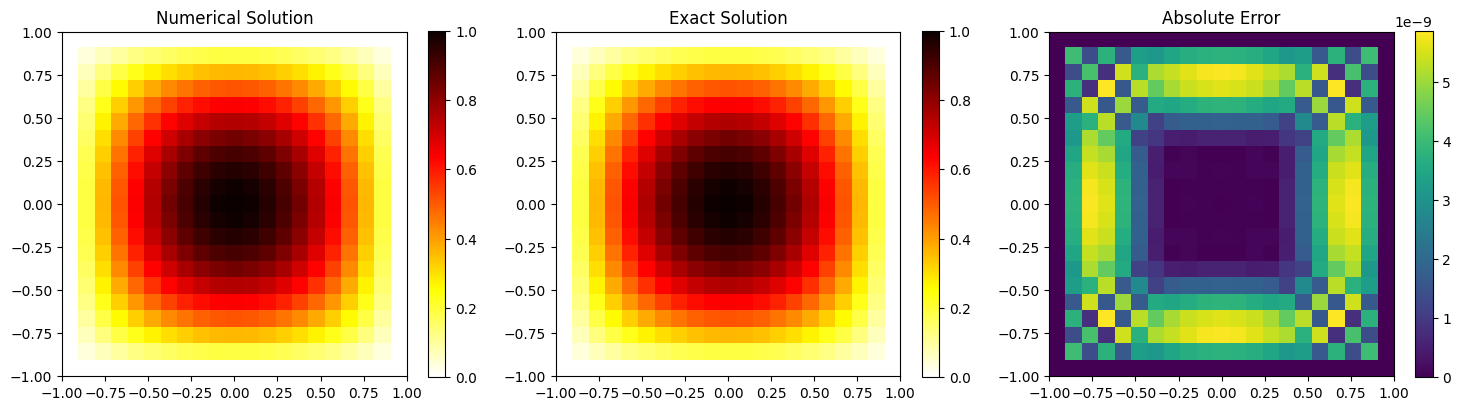

In [10]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 20, 20

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 1000
dt = 1
alpha = 1

print(f"dt: {dt}, N: {Nx+1}, M: {Ny+1}")

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))
A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

# initial condition
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#exact solution
XX, YY = np.meshgrid(X, Y)
phi_exact = exact_solution(XX, YY)

# L2 norm error 계산
error = phi - phi_exact
L2_error = np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy)
print(f"L2 norm of error: {L2_error:.3e}")

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

im0 = axs[0].imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[0].set_title("Numerical Solution")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(phi_exact, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[1].set_title("Exact Solution")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.abs(error), extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[2].set_title("Absolute Error")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


dt: 0.1, N: 31, M: 31
L2 norm of error: 4.673e-14


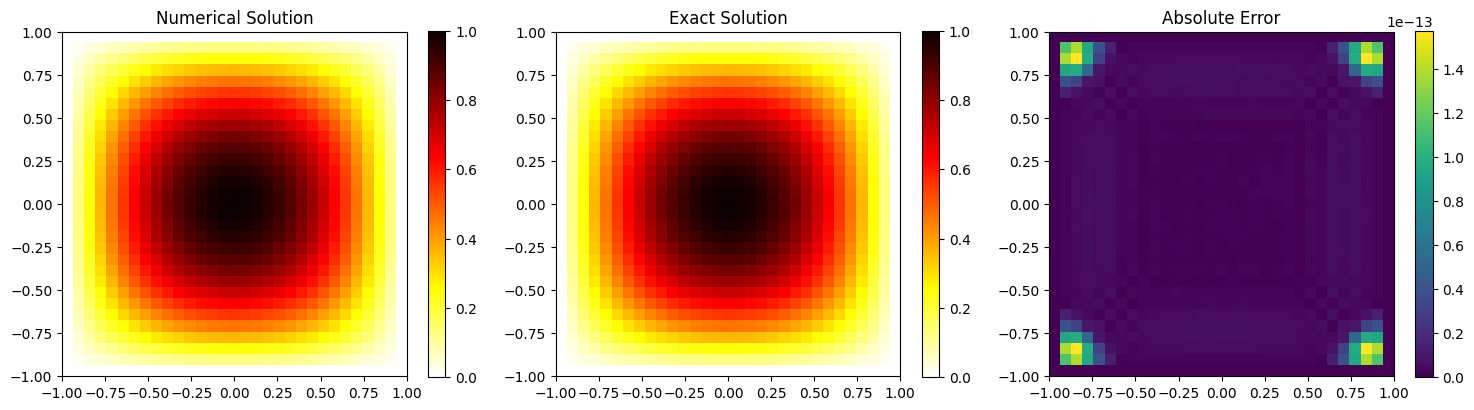

In [12]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 30, 30

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 500
dt = 0.1
alpha = 1

print(f"dt: {dt}, N: {Nx+1}, M: {Ny+1}")

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))
A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

# initial condition
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#exact solution
XX, YY = np.meshgrid(X, Y)
phi_exact = exact_solution(XX, YY)

# L2 norm error 계산
error = phi - phi_exact
L2_error = np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy)
print(f"L2 norm of error: {L2_error:.3e}")

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

im0 = axs[0].imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[0].set_title("Numerical Solution")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(phi_exact, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[1].set_title("Exact Solution")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.abs(error), extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[2].set_title("Absolute Error")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


dt: 0.1, N: 51, M: 51
L2 norm of error: 1.090e-12


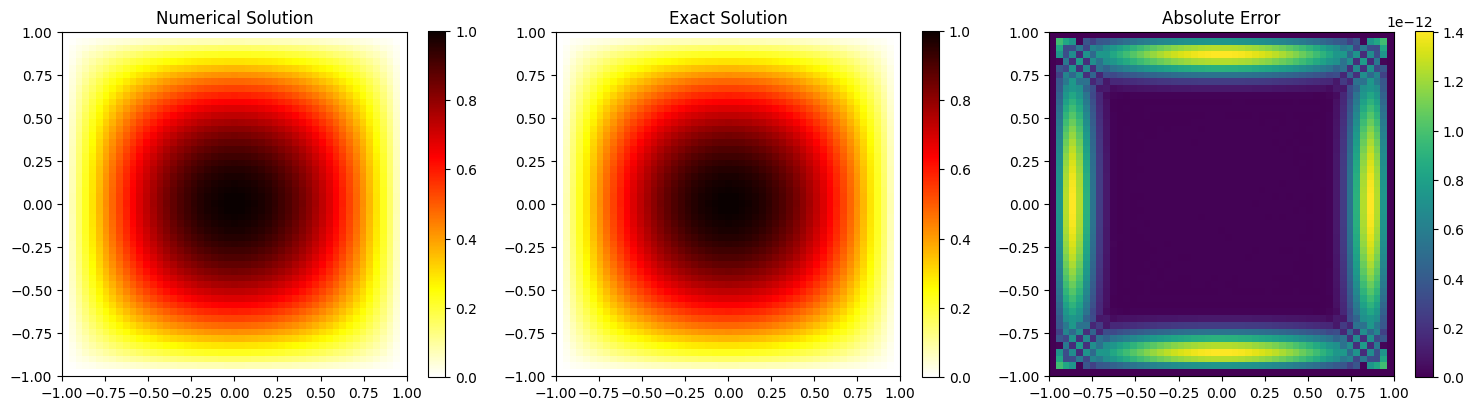

In [13]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 50, 50

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 1000
dt = 0.1
alpha = 1

print(f"dt: {dt}, N: {Nx+1}, M: {Ny+1}")

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))
A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

# initial condition
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#exact solution
XX, YY = np.meshgrid(X, Y)
phi_exact = exact_solution(XX, YY)

# L2 norm error 계산
error = phi - phi_exact
L2_error = np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy)
print(f"L2 norm of error: {L2_error:.3e}")

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

im0 = axs[0].imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[0].set_title("Numerical Solution")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(phi_exact, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[1].set_title("Exact Solution")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.abs(error), extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[2].set_title("Absolute Error")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


dt: 0.1, N: 41, M: 21
L2 norm of error: 8.354e-16


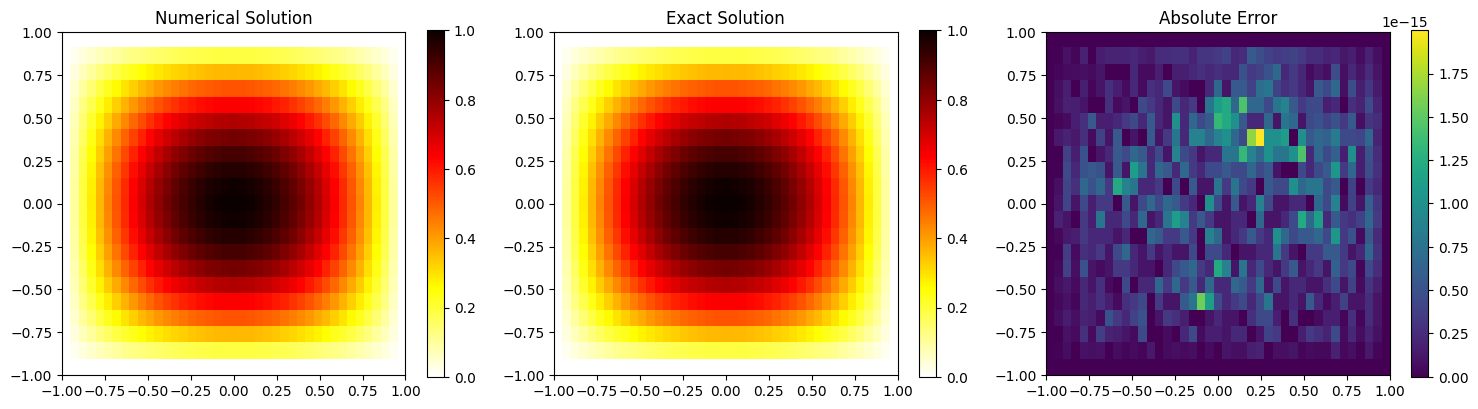

In [14]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 40, 20

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 1000
dt = 0.1
alpha = 1

print(f"dt: {dt}, N: {Nx+1}, M: {Ny+1}")

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))
A = I - (alpha*dt/2)*L
B = I + (alpha*dt/2)*L

# initial condition
phi = np.zeros((Ny+1, Nx+1))

for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

#exact solution
XX, YY = np.meshgrid(X, Y)
phi_exact = exact_solution(XX, YY)

# L2 norm error 계산
error = phi - phi_exact
L2_error = np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy)
print(f"L2 norm of error: {L2_error:.3e}")

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

im0 = axs[0].imshow(phi, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[0].set_title("Numerical Solution")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(phi_exact, extent=[-1, 1, -1, 1], origin='lower', cmap='hot_r')
axs[1].set_title("Exact Solution")
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(np.abs(error), extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
axs[2].set_title("Absolute Error")
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()


Order between dt=0.1 and dt=0.5: 3.2689
Order between dt=0.5 and dt=1: 1.7073


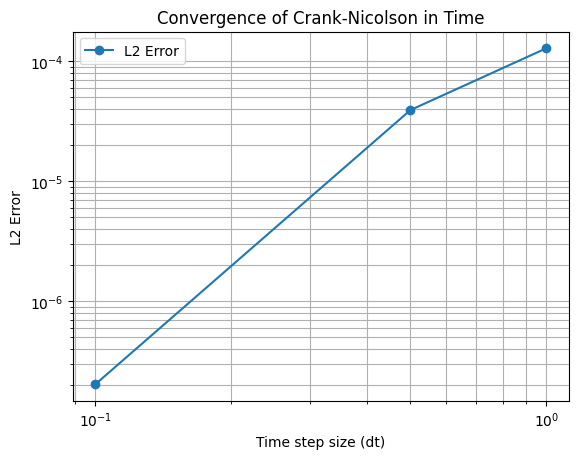

In [22]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Lx, Ly = 2, 2
Nx, Ny = 50, 50

X = np.linspace(-1, 1, Nx+1)
Y = np.linspace(-1, 1, Ny+1)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

Nt = 300
dt_list = [0.1, 0.5, 1]
alpha = 1

# coefficient matrix
Ix = identity(n=Nx-1)
Iy = identity(n=Ny-1)

kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

I = identity((Nx-1)*(Ny-1))

L2_error=[]
for dt in dt_list:
  phi = np.zeros((Ny+1, Nx+1))

  A = I - (alpha*dt/2)*L
  B = I + (alpha*dt/2)*L

  for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

  #exact solution
  XX, YY = np.meshgrid(X, Y)
  phi_exact = exact_solution(XX, YY)

  # L2 norm error 계산
  error = phi - phi_exact
  L2_error.append(np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy))

# 수렴 차수 계산 (log-log plot의 기울기)
dt_arr = np.array(dt_list)
L2_arr = np.array(L2_error)
order = np.diff(np.log(L2_arr)) / np.diff(np.log(dt_arr))

# 결과 출력
for i in range(len(order)):
    print(f"Order between dt={dt_list[i]} and dt={dt_list[i+1]}: {order[i]:.4f}")

# 시각화
plt.figure()
plt.loglog(dt_list, L2_error, 'o-', label='L2 Error')
plt.xlabel('Time step size (dt)')
plt.ylabel('L2 Error')
plt.grid(True, which='both')
plt.title('Convergence of Crank-Nicolson in Time')
plt.legend()
plt.show()


Order between h=0.2 and h=0.1: -0.0130
Order between h=0.1 and h=0.05: -0.0033
Order between h=0.05 and h=0.025: -0.0008


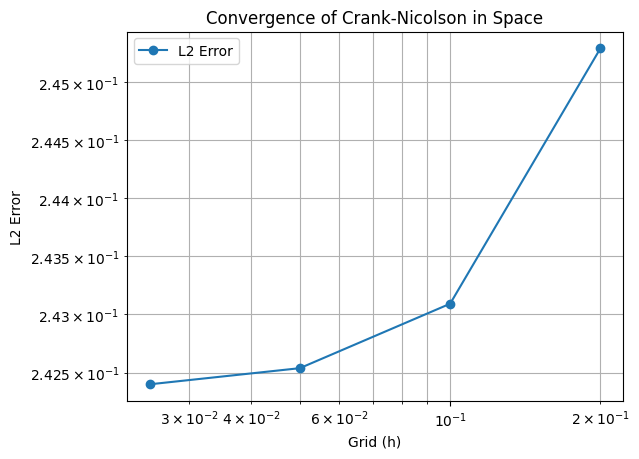

In [29]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

def source(x, y):
    return 2 * (2 - x**2 - y**2)

def exact_solution(x, y):
    return (1 - x**2) * (1 - y**2)

# parameters
Nt = 300
dt = 0.001
alpha = 1
Lx, Ly = 2, 2
N_list = [10, 20, 40, 80]

L2_error=[]

for N in N_list:
  Nx = Ny = N
  X = np.linspace(-1, 1, Nx+1)
  Y = np.linspace(-1, 1, Ny+1)

  dx = X[1] - X[0]
  dy = Y[1] - Y[0]

  # coefficient matrix
  Ix = identity(n=Nx-1)
  Iy = identity(n=Ny-1)

  kx = [np.ones(Nx-2), -2*np.ones(Nx-1), np.ones(Nx-2)]
  Tx = diags(kx, offsets=[-1, 0, 1], shape=(Nx-1,Nx-1))
  ky = [np.ones(Ny-2), -2*np.ones(Ny-1), np.ones(Ny-2)]
  Ty = diags(ky, offsets=[-1, 0, 1], shape=(Ny-1,Ny-1))

  L = kron(Iy, Tx)/dx**2 + kron(Ty, Ix)/dy**2

  I = identity((Nx-1)*(Ny-1))

  phi = np.zeros((Ny+1, Nx+1))

  A = I - (alpha*dt/2)*L
  B = I + (alpha*dt/2)*L

  for n in range(Nt):
    phi_vec = np.array([])
    source_vec = np.array([])
    for y in range(1, Ny):
        phi_vec = np.hstack((phi_vec, phi[y,1:-1]))
        source_vec = np.hstack((source_vec, source(Y[y], X[1:-1])))

    rhs = B @ phi_vec + dt * source_vec
    phi_new = spsolve(A, rhs)
    phi[1:-1, 1:-1] = phi_new.reshape(Ny-1, Nx-1)

  #exact solution
  XX, YY = np.meshgrid(X, Y)
  phi_exact = exact_solution(XX, YY)

  # L2 norm error 계산
  error = phi - phi_exact
  L2_error.append(np.sqrt(np.sum(error[1:-1, 1:-1]**2) * dx * dy))

# 수렴 차수 계산 (log-log plot의 기울기)
h_list = [2/N for N in N_list]
h_arr = np.array(h_list)
L2_arr = np.array(L2_error)
order = np.diff(np.log(L2_arr)) / np.diff(np.log(h_arr))

# 결과 출력
for i in range(len(order)):
    print(f"Order between h={h_list[i]} and h={h_list[i+1]}: {-order[i]:.4f}")

# 시각화
plt.figure()
plt.loglog(h_list, L2_error, 'o-', label='L2 Error')
plt.xlabel('Grid (h)')
plt.ylabel('L2 Error')
plt.grid(True, which='both')
plt.title('Convergence of Crank-Nicolson in Space')
plt.legend()
plt.show()
